Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

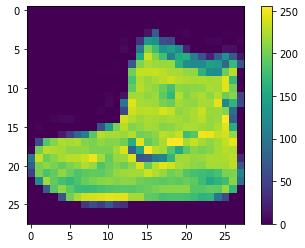

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='best_model.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

C:\Users\PedroFerreira\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
Epoch 1/5
100/100 [==============================] - 2s 14ms/step - loss: 0.6684 - accuracy: 0.7680 - val_loss: 0.4592 - val_accuracy: 0.8396


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.0320139 ,  0.07558075,  0.0308895 , ..., -0.04069492,
         0.02602583, -0.01920933],
       [ 0.02590167,  0.02629837,  0.03387014, ..., -0.06033812,
        -0.00790767,  0.01390645],
       [-0.07691419, -0.06667519, -0.06263224, ...,  0.0712282 ,
        -0.04715736,  0.00369192],
       ...,
       [ 0.00216615,  0.05574758,  0.02140027, ..., -0.02454195,
         0.04420855, -0.03836462],
       [ 0.03288101, -0.07486124, -0.00101645, ..., -0.02526641,
        -0.00884009, -0.05937811],
       [ 0.03399581, -0.0725341 , -0.07590725, ..., -0.0422976 ,
        -0.05696331,  0.03108908]], dtype=float32)

In [9]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [10]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()


[array([[0.47096315, 0.9265    , 0.975361  , ..., 0.8836844 , 0.5403213 ,
         0.6401354 ],
        [0.24006695, 0.7155571 , 0.06556571, ..., 0.76785654, 0.64284897,
         0.12953661],
        [0.85123116, 0.67932534, 0.69272935, ..., 0.8267779 , 0.07665592,
         0.7159588 ],
        ...,
        [0.1729081 , 0.5594198 , 0.0708252 , ..., 0.9668911 , 0.00969639,
         0.4273999 ],
        [0.7934944 , 0.7049128 , 0.6134326 , ..., 0.09294018, 0.5268841 ,
         0.9393634 ],
        [0.63047665, 0.78711313, 0.80091137, ..., 0.2683523 , 0.89644945,
         0.6435318 ]], dtype=float32),
 array([-0.04609143, -0.02091925,  0.01780056,  0.06079424,  0.02476858,
        -0.00964745, -0.01932851, -0.01045308,  0.01434404,  0.08558658,
        -0.01432328,  0.01287397, -0.00806976, -0.01166657, -0.04725511,
         0.00845387, -0.00918727,  0.00891213,  0.01317548, -0.01964424,
         0.04252921,  0.03062216, -0.01804262,  0.00445359,  0.0036837 ,
        -0.01294317,  0.02810

In [11]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 49.8816 - accuracy: 0.4158 - val_loss: 9.4247 - val_accuracy: 0.6686
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 11.9857 - accuracy: 0.6174 - val_loss: 5.7608 - val_accuracy: 0.6865
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 5.2298 - accuracy: 0.6567 - val_loss: 5.3798 - val_accuracy: 0.6727
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.6443 - accuracy: 0.6925 - val_loss: 2.4535 - val_accuracy: 0.6551
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.5343 - accuracy: 0.7326 - val_loss: 1.1781 - val_accuracy: 0.7485


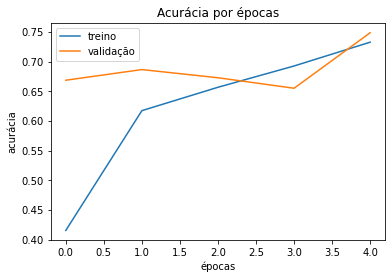

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


In [13]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

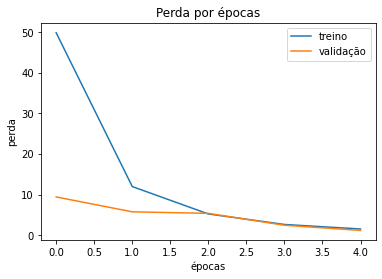

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [15]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [16]:
modelo.save('model_epoch5_nodes3.h5')
modelo_salvo = load_model('model_epoch5_nodes3.h5')

Visualizando as acurácias de treino e validação por época

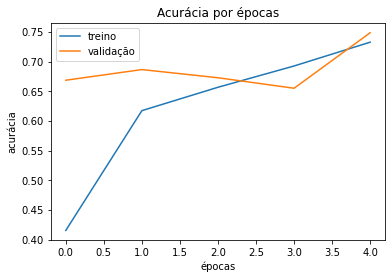

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

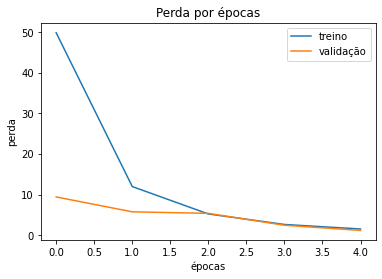

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [19]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 8
número da imagem de teste: 2
resultado teste modelo salvo: 8
número da imagem de teste: 2


Avaliando o modelo

In [20]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 28480.3301 - accuracy: 0.1000
Perda do teste: 28480.330078125
Acurácia do teste: 0.10000000149011612
